In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/BTECH/cstk/Phishing-URL-Detection-main/data/url_concatenated.csv")

In [3]:
df.head()

,url,phishing
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1
3,https://mail.printakid.com/www.online.american...,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1


In [4]:
def initial_read(df):
    print('SHAPE')
    print(df.shape)
    print('=====')
    print('DTYPES')
    print(df.dtypes)
    print('=====')
    print('NULL VALUES')
    print(df.isnull().sum())
    print('=====')

In [5]:
initial_read(df)

SHAPE
(95913, 2)
=====
DTYPES
url         object
phishing     int64
dtype: object
=====
NULL VALUES
url         0
phishing    0
dtype: int64
=====


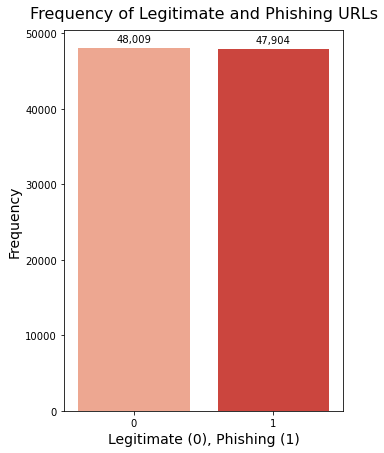

In [6]:
plt.figure(figsize = (5, 7))        
bar = sns.countplot(x=df["phishing"], 
              data=df, 
              palette="Reds")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 16, pad = 12)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.show();

In [7]:
import urllib
from urllib.parse import urlparse

In [8]:
urls = [url for url in df['url']]

In [9]:
# Code adapted from https://stackoverflow.com/questions/48927719/parse-split-urls-in-a-pandas-dataframe-using-urllib

df['protocol'],df['domain'],df['path'],df['query'],df['fragment'] = zip(*[urllib.parse.urlsplit(x) for x in urls])

In [10]:
# Check
df.head()

,url,phishing,protocol,domain,path,query,fragment
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,https,nobell.it,/70ffb52d079109dca5664cce6f317373782/login.Sky...,cmd=_profile-ach&outdated_page_tmpl=p/gen/fail...,
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,https,www.dghjdgf.com,/paypal.co.uk/cycgi-bin/webscrcmd=_home-custom...,,
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,https,serviciosbys.com,/paypal.cgi.bin.get-into.herf.secure.dispatch3...,,
3,https://mail.printakid.com/www.online.american...,1,https,mail.printakid.com,/www.online.americanexpress.com/index.html,,
4,https://thewhiskeydregs.com/wp-content/themes/...,1,https,thewhiskeydregs.com,/wp-content/themes/widescreen/includes/temp/pr...,84784787824HDJNDJDSJSHD//2724782784/,


In [11]:
def get_features(df):
    needed_cols = ['url', 'domain', 'path', 'query', 'fragment']
    for col in needed_cols:
        df[f'{col}_length']=df[col].str.len()
        df[f'qty_dot_{col}'] = df[[col]].applymap(lambda x: str.count(x, '.'))
        df[f'qty_hyphen_{col}'] = df[[col]].applymap(lambda x: str.count(x, '-'))
        df[f'qty_slash_{col}'] = df[[col]].applymap(lambda x: str.count(x, '/'))
        df[f'qty_questionmark_{col}'] = df[[col]].applymap(lambda x: str.count(x, '?'))
        df[f'qty_equal_{col}'] = df[[col]].applymap(lambda x: str.count(x, '='))
        df[f'qty_at_{col}'] = df[[col]].applymap(lambda x: str.count(x, '@'))
        df[f'qty_and_{col}'] = df[[col]].applymap(lambda x: str.count(x, '&'))
        df[f'qty_exclamation_{col}'] = df[[col]].applymap(lambda x: str.count(x, '!'))
        df[f'qty_space_{col}'] = df[[col]].applymap(lambda x: str.count(x, ' '))
        df[f'qty_tilde_{col}'] = df[[col]].applymap(lambda x: str.count(x, '~'))
        df[f'qty_comma_{col}'] = df[[col]].applymap(lambda x: str.count(x, ','))
        df[f'qty_plus_{col}'] = df[[col]].applymap(lambda x: str.count(x, '+'))
        df[f'qty_asterisk_{col}'] = df[[col]].applymap(lambda x: str.count(x, '*'))
        df[f'qty_hashtag_{col}'] = df[[col]].applymap(lambda x: str.count(x, '#'))
        df[f'qty_dollar_{col}'] = df[[col]].applymap(lambda x: str.count(x, '$'))
        df[f'qty_percent_{col}'] = df[[col]].applymap(lambda x: str.count(x, '%'))

In [12]:
# Applying function
get_features(df)

In [13]:
# Check
df.head()

,url,phishing,protocol,domain,path,query,fragment,url_length,qty_dot_url,qty_hyphen_url,...,qty_and_fragment,qty_exclamation_fragment,qty_space_fragment,qty_tilde_fragment,qty_comma_fragment,qty_plus_fragment,qty_asterisk_fragment,qty_hashtag_fragment,qty_dollar_fragment,qty_percent_fragment
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,https,nobell.it,/70ffb52d079109dca5664cce6f317373782/login.Sky...,cmd=_profile-ach&outdated_page_tmpl=p/gen/fail...,,233,6,4,...,0,0,0,0,0,0,0,0,0,0
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,https,www.dghjdgf.com,/paypal.co.uk/cycgi-bin/webscrcmd=_home-custom...,,,89,5,2,...,0,0,0,0,0,0,0,0,0,0
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,https,serviciosbys.com,/paypal.cgi.bin.get-into.herf.secure.dispatch3...,,,185,7,1,...,0,0,0,0,0,0,0,0,0,0
3,https://mail.printakid.com/www.online.american...,1,https,mail.printakid.com,/www.online.americanexpress.com/index.html,,,68,6,0,...,0,0,0,0,0,0,0,0,0,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,https,thewhiskeydregs.com,/wp-content/themes/widescreen/includes/temp/pr...,84784787824HDJNDJDSJSHD//2724782784/,,124,1,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
num_cols = df.select_dtypes(exclude='object')

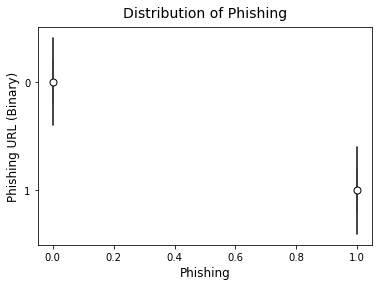

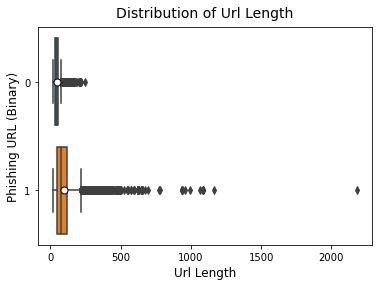

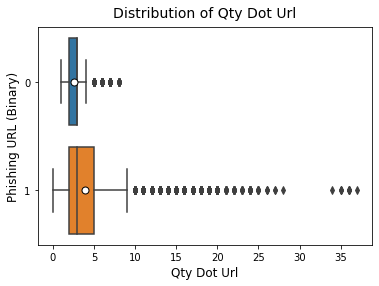

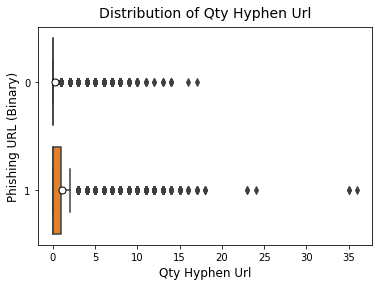

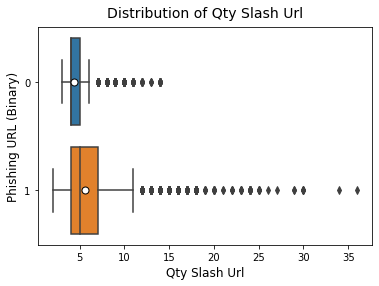

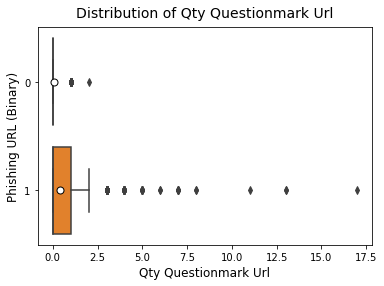

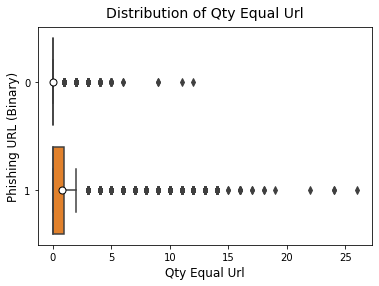

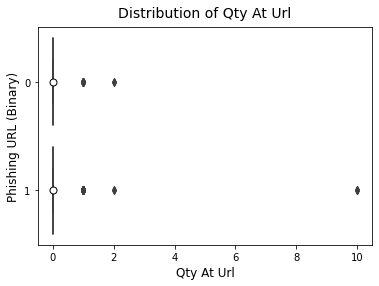

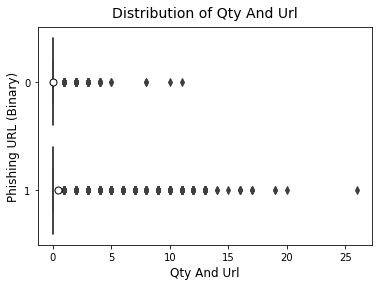

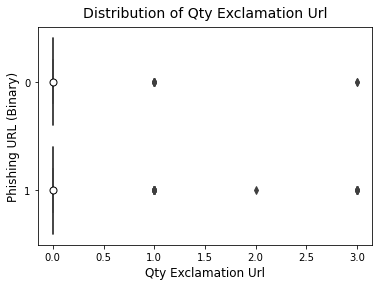

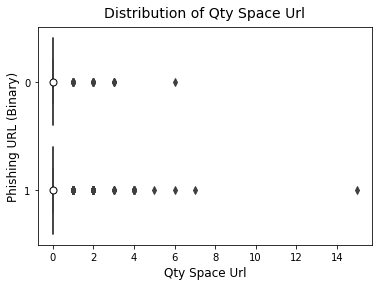

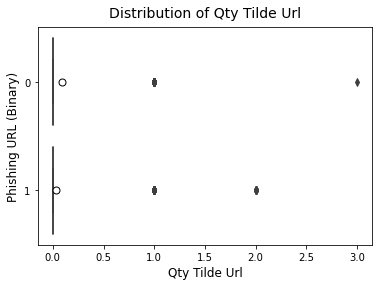

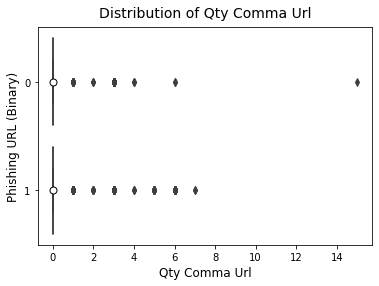

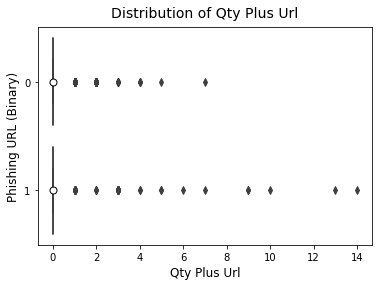

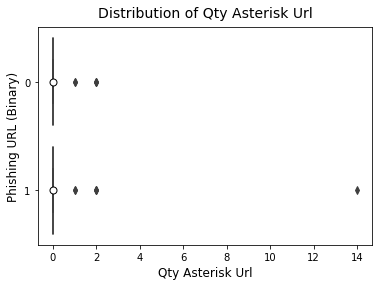

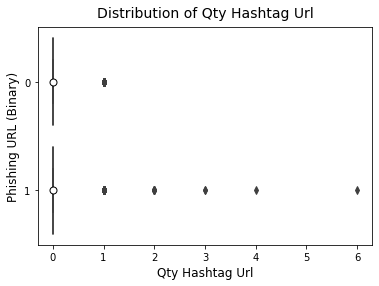

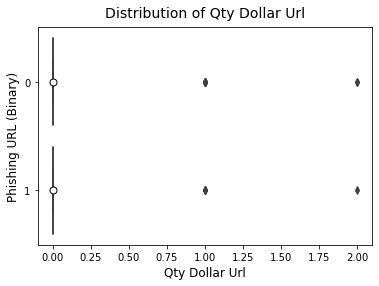

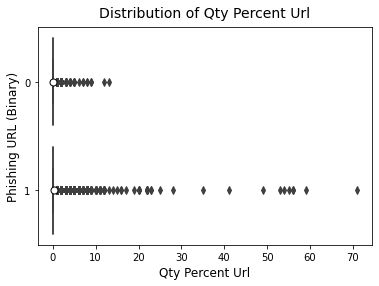

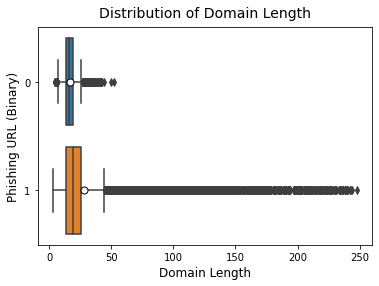

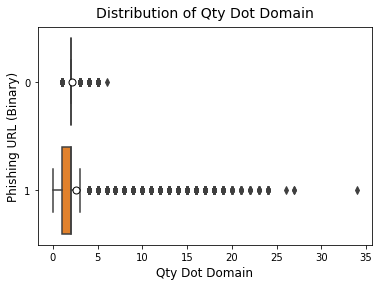

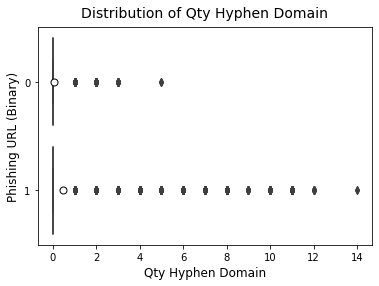

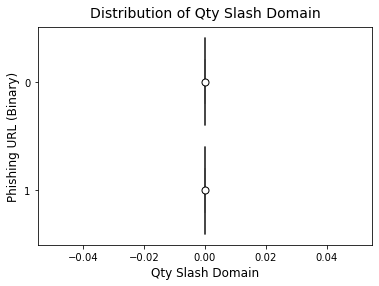

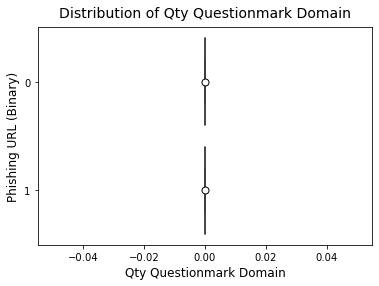

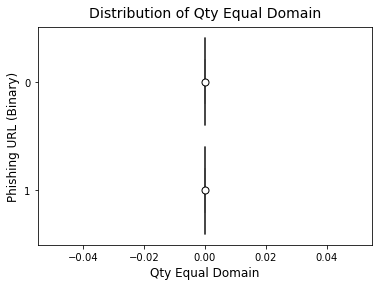

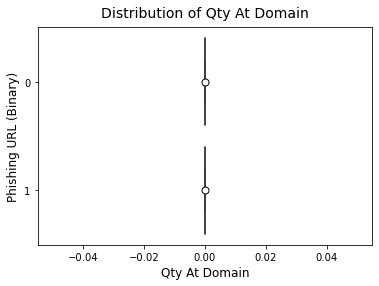

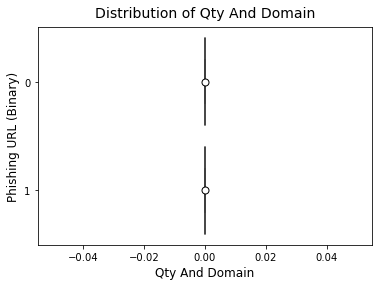

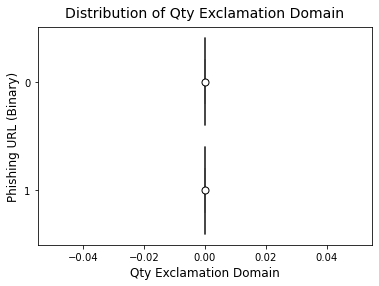

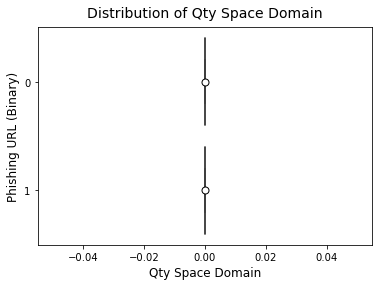

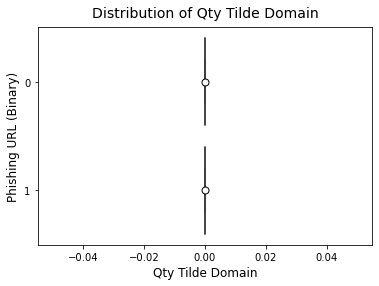

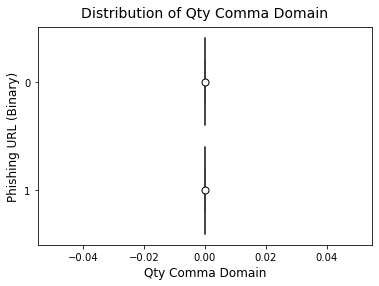

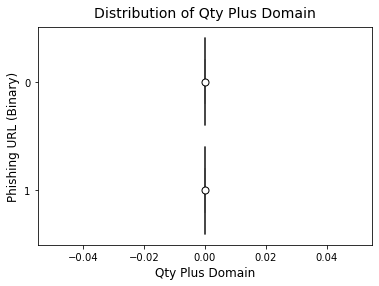

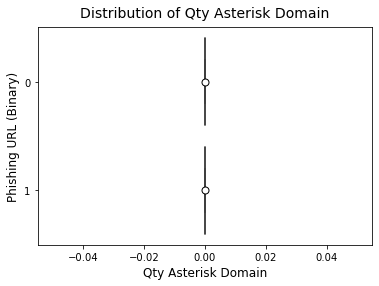

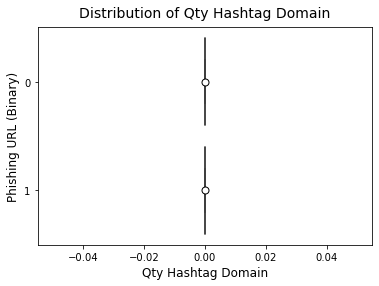

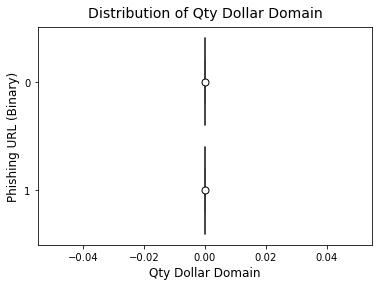

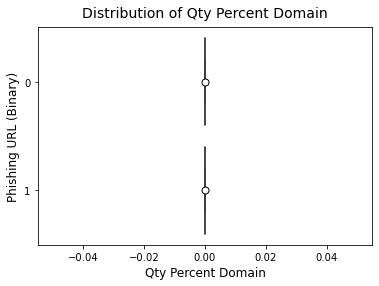

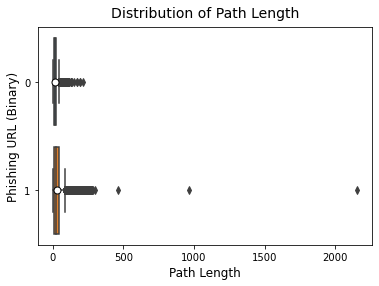

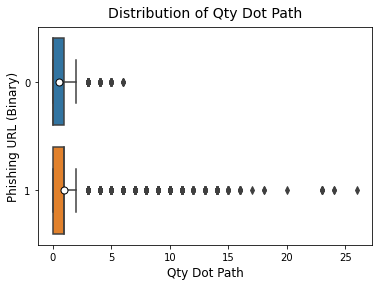

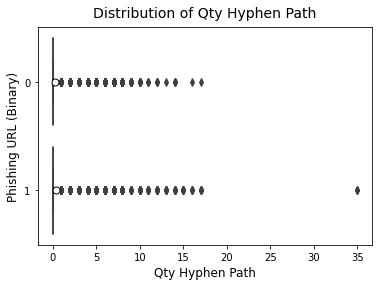

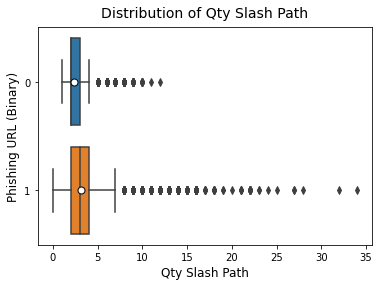

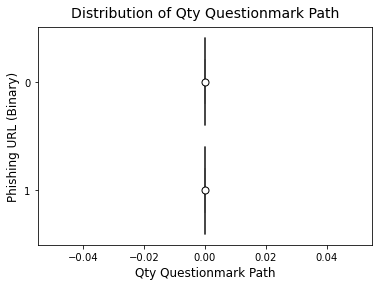

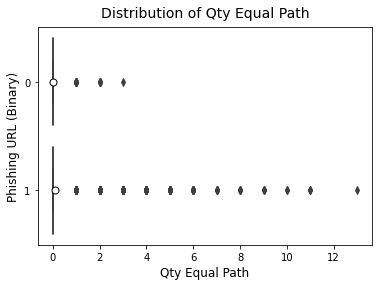

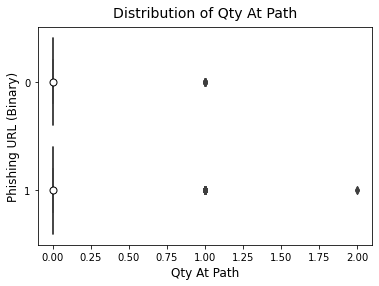

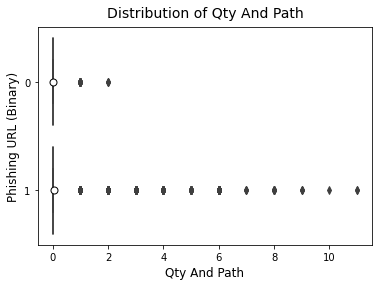

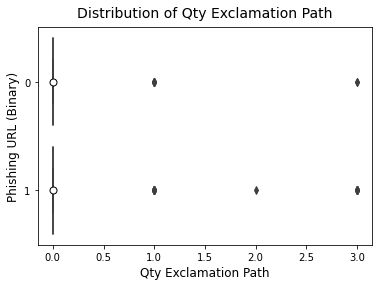

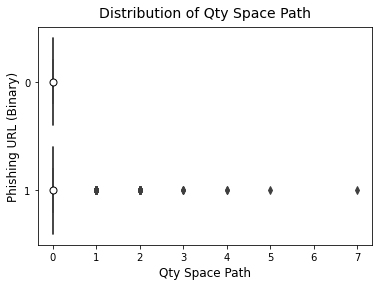

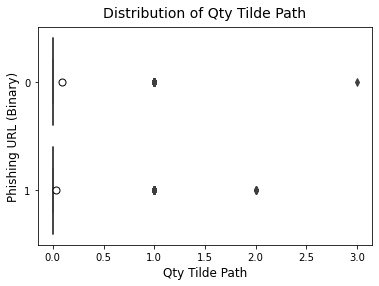

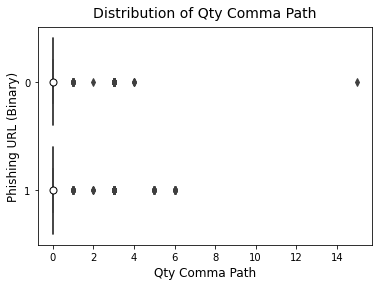

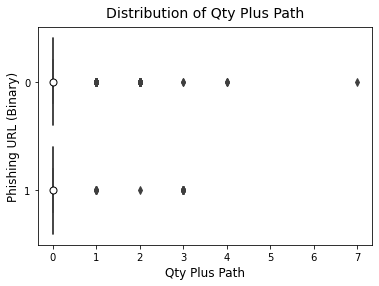

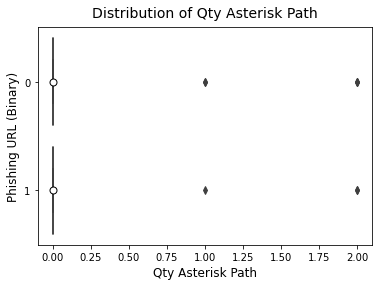

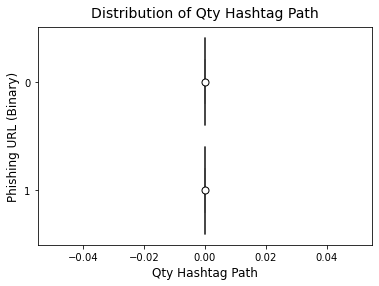

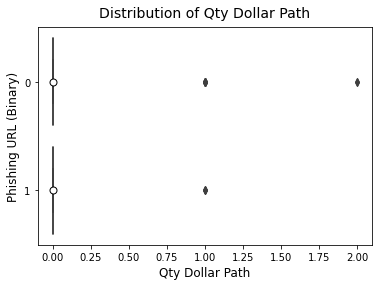

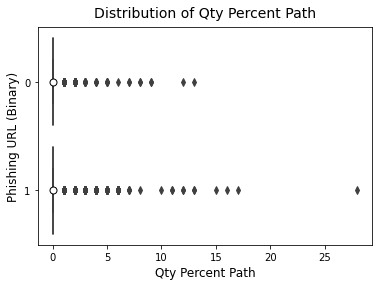

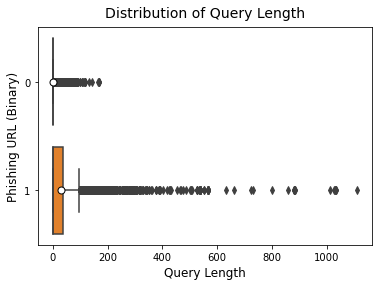

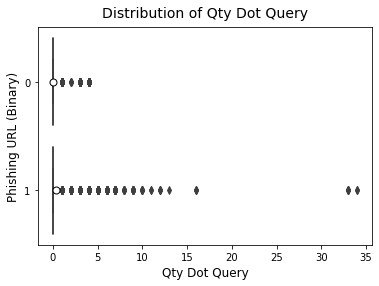

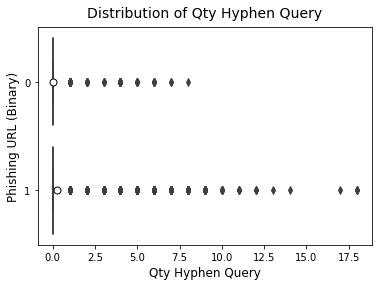

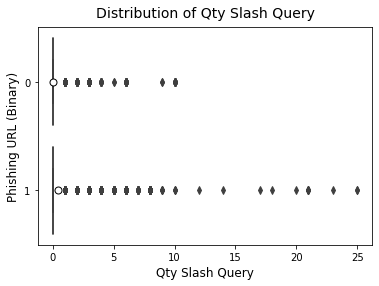

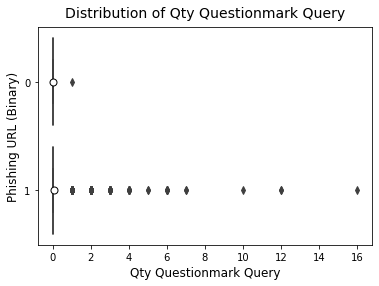

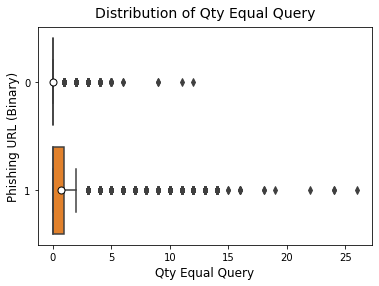

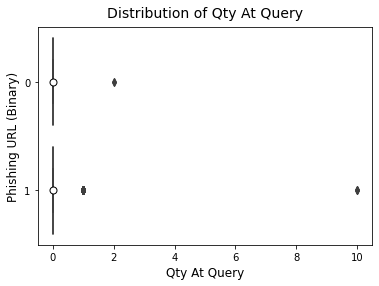

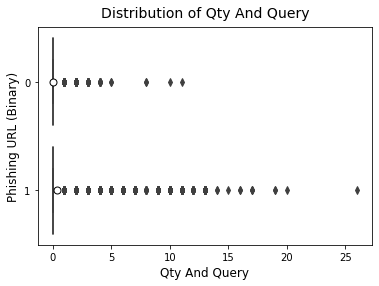

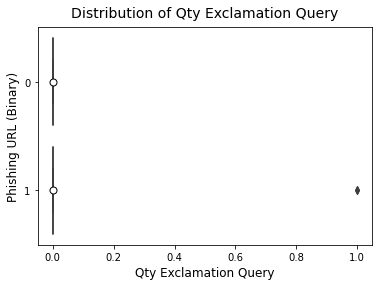

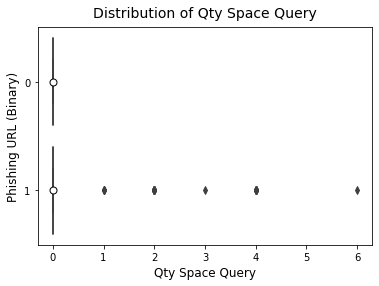

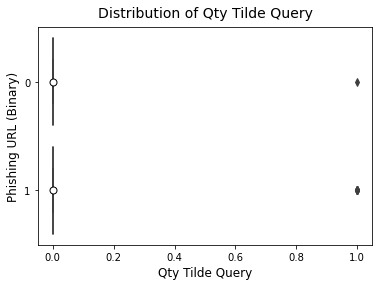

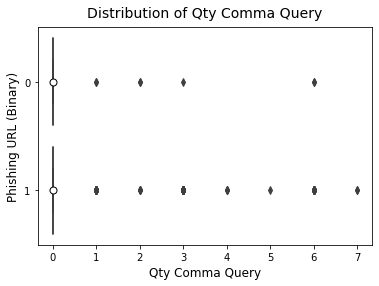

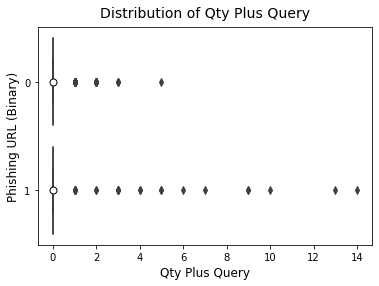

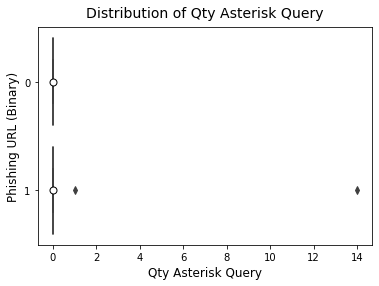

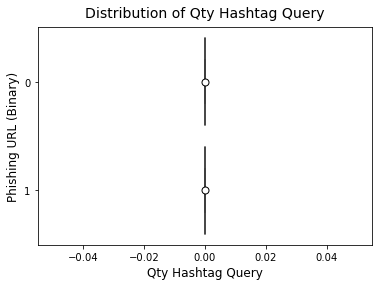

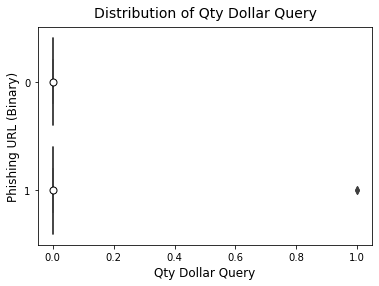

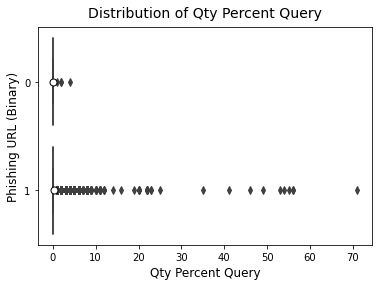

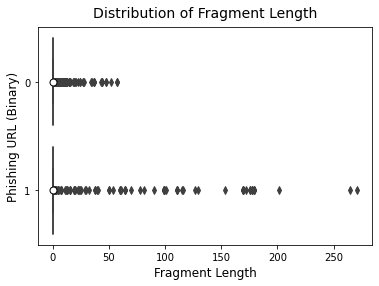

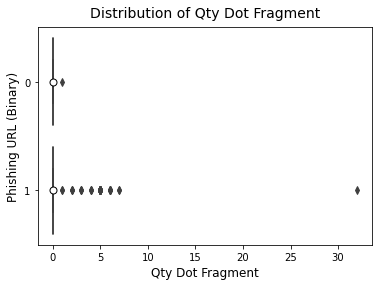

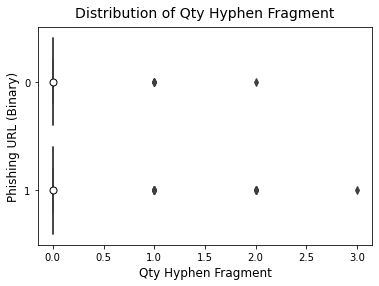

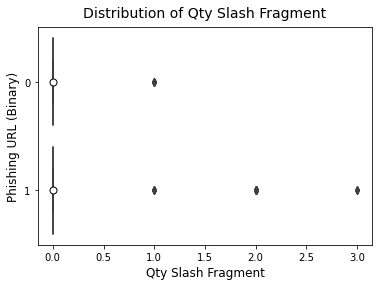

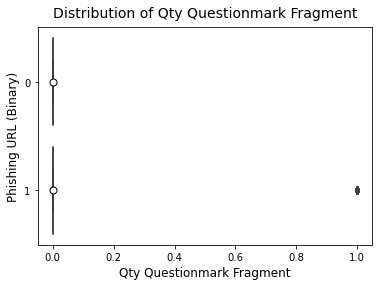

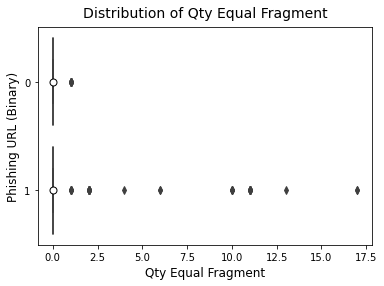

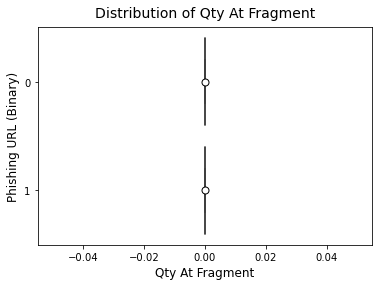

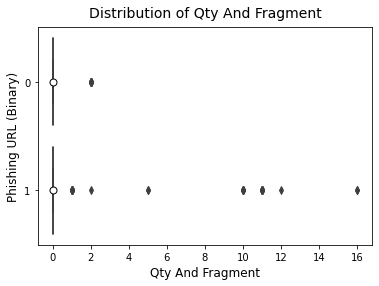

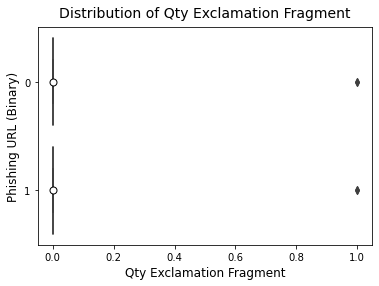

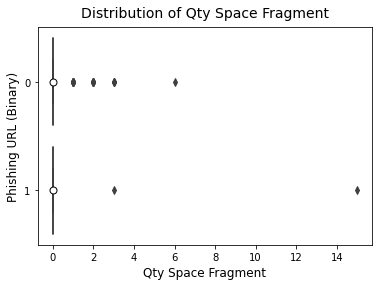

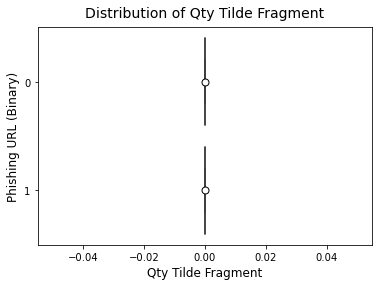

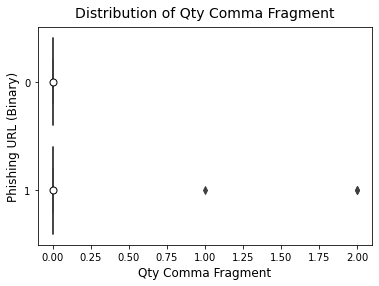

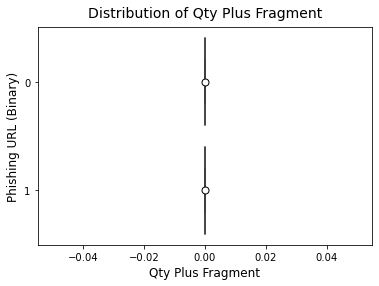

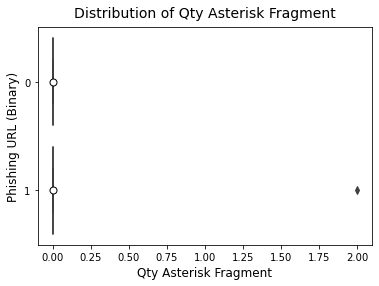

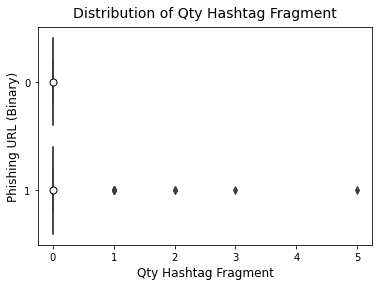

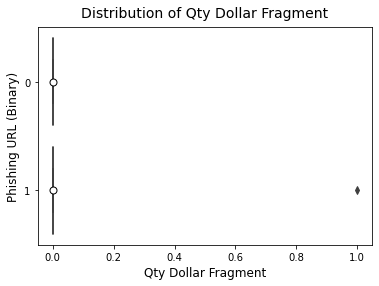

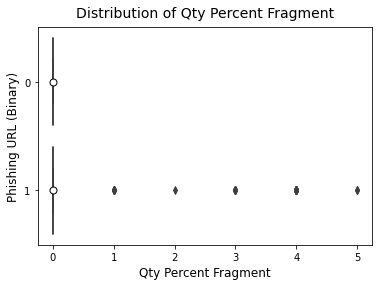

In [15]:
for col in num_cols:
    column_name = col.title().replace('_', ' ')
    title = 'Distribution of ' + column_name
    sns.boxplot(x=df[col],
                y=df['phishing'],
                data=df,
                orient='h',
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"7"})
    plt.xlabel(column_name, fontsize = 12)
    plt.ylabel('Phishing URL (Binary)', fontsize = 12)
    plt.title(title, fontsize = 14, pad = 10)
    plt.show();

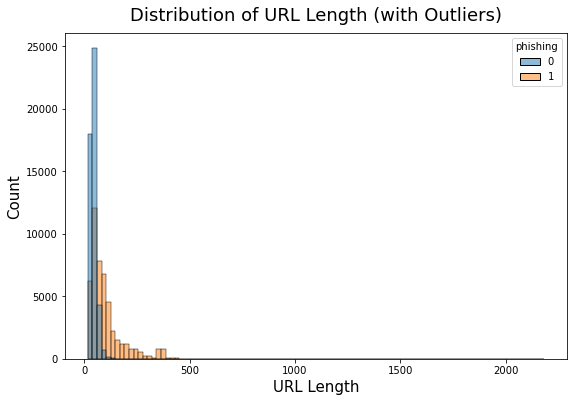

In [17]:
plt.figure(figsize=(9,6))
sns.histplot(data=df, x=df["url_length"], hue = 'phishing', bins=100)
plt.title('Distribution of URL Length (with Outliers)', fontsize = 18, pad = 12)
plt.xlabel("URL Length", fontsize = 15)
plt.ylabel("Count",fontsize = 15);
plt.show()

In [16]:
Q1 = df['url_length'].quantile(0.25)
Q3 = df['url_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_url_length = df[(df['url_length']> lower_bound)]
filtered_url_length = df[(df['url_length']< upper_bound)]

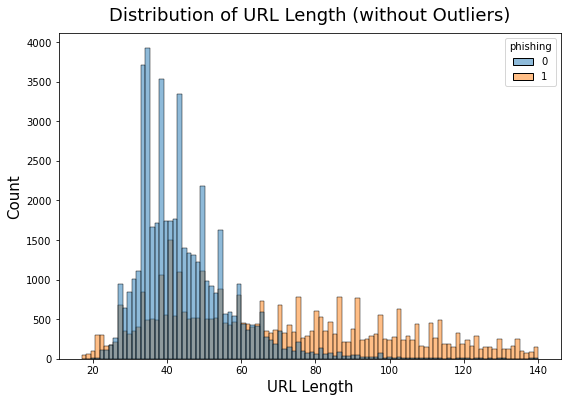

In [17]:
plt.figure(figsize=(9,6))
sns.histplot(data=filtered_url_length, x="url_length", hue = 'phishing', bins = 100)
plt.title('Distribution of URL Length (without Outliers)', fontsize = 18, pad = 12)
plt.xlabel("URL Length", fontsize = 15)
plt.ylabel("Count",fontsize = 15);
plt.show()

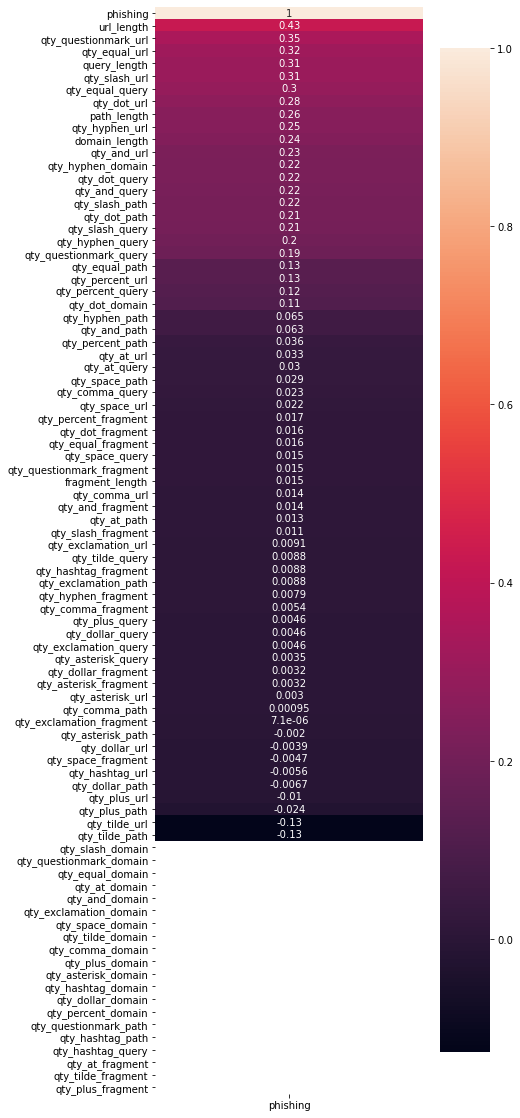

In [18]:
plt.figure(figsize=(6,20))
sns.heatmap(df.corr()[['phishing']].sort_values('phishing', ascending=False), annot=True);

In [19]:
col_in_question = ['qty_slash_domain', 'qty_questionmark_domain','qty_equal_domain', 'qty_at_domain', 'qty_and_domain',
 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain','qty_comma_domain', 'qty_plus_domain', 
 'qty_asterisk_domain','qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_questionmark_path', 
 'qty_hashtag_path', 'qty_hashtag_query', 'qty_at_fragment','qty_tilde_fragment', 'qty_plus_fragment']

In [20]:
for col in col_in_question:
    print(df[col].value_counts())

0    95913
Name: qty_slash_domain, dtype: int64
0    95913
Name: qty_questionmark_domain, dtype: int64
0    95913
Name: qty_equal_domain, dtype: int64
0    95913
Name: qty_at_domain, dtype: int64
0    95913
Name: qty_and_domain, dtype: int64
0    95913
Name: qty_exclamation_domain, dtype: int64
0    95913
Name: qty_space_domain, dtype: int64
0    95913
Name: qty_tilde_domain, dtype: int64
0    95913
Name: qty_comma_domain, dtype: int64
0    95913
Name: qty_plus_domain, dtype: int64
0    95913
Name: qty_asterisk_domain, dtype: int64
0    95913
Name: qty_hashtag_domain, dtype: int64
0    95913
Name: qty_dollar_domain, dtype: int64
0    95913
Name: qty_percent_domain, dtype: int64
0    95913
Name: qty_questionmark_path, dtype: int64
0    95913
Name: qty_hashtag_path, dtype: int64
0    95913
Name: qty_hashtag_query, dtype: int64
0    95913
Name: qty_at_fragment, dtype: int64
0    95913
Name: qty_tilde_fragment, dtype: int64
0    95913
Name: qty_plus_fragment, dtype: int64


In [21]:
df.drop(columns = col_in_question, inplace=True)

In [22]:
df.to_csv('E:/BTECH/cstk/Phishing-URL-Detection-main/data/url_updated.csv', index=False)

 # **<span style="font-size:larger;"> 02: <span style="color:blue">Model Selection & Evaluation</span>** #

#### Imports and Read-Ins:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import pickle

import warnings
warnings.filterwarnings("ignore")

In [3]:
import random
random.seed(42)

In [4]:
df = pd.read_csv('E:/BTECH/cstk/Phishing-URL-Detection-main/data/url_updated.csv')

# I. Model Setup

### Baseline

In [26]:
df['phishing'].value_counts(normalize=True)

0    0.500547
1    0.499453
Name: phishing, dtype: float64

### Train Test Split

In [6]:
X = df.drop(columns=['url', 'protocol','domain', 'path', 'query', 'fragment','phishing'])

y = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, stratify = y )

### Scale Data

In [7]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

# II. Model Selection

We will run a single model for each of the following 9 classifiers:

- Stochastic Gradient Descent Classifier
- Logistic Regression
- AdaBoost
- Gradient Boost
- Decision Tree Classifier
- Bagging Classifier
- K-Nearest Neighbors Classifier
- Extra Trees Classifier
- Random Forest Classifier

Two functions are built to help aid our model selection process. One for scaled data and one for unscaled data.

In [8]:
def get_scores_sc(model):
    
    # instantiate model
    model = model()
    
    # fit to scaled data
    model.fit(X_train_sc, y_train)
    
    # make predictions
    preds = model.predict(X_test_sc)

    # print results
    print(f'{model} Training Score: {model.score(X_train_sc, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test_sc, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [9]:
def get_scores(model):
    
    # instantiate model
    model = model()
    
    # fit to data
    model.fit(X_train, y_train)
    
    # make predictions
    preds = model.predict(X_test)

    # print results
    print(f'{model} Training Score: {model.score(X_train, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [32]:
get_scores_sc(SGDClassifier)

SGDClassifier() Training Score: 0.8037089554313677
SGDClassifier() Testing Score: 0.7998665498978272

              precision    recall  f1-score   support

           0       0.75      0.90      0.82     12003
           1       0.87      0.70      0.78     11976

    accuracy                           0.80     23979
   macro avg       0.81      0.80      0.80     23979
weighted avg       0.81      0.80      0.80     23979

[[10780  1223]
 [ 3576  8400]]


In [33]:
get_scores(AdaBoostClassifier)

AdaBoostClassifier() Training Score: 0.8599271554480497
AdaBoostClassifier() Testing Score: 0.8570415780474582

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     12003
           1       0.88      0.82      0.85     11976

    accuracy                           0.86     23979
   macro avg       0.86      0.86      0.86     23979
weighted avg       0.86      0.86      0.86     23979

[[10705  1298]
 [ 2130  9846]]


In [34]:
get_scores(GradientBoostingClassifier)

GradientBoostingClassifier() Training Score: 0.8755108849778964
GradientBoostingClassifier() Testing Score: 0.8739313566036949

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     12003
           1       0.90      0.84      0.87     11976

    accuracy                           0.87     23979
   macro avg       0.88      0.87      0.87     23979
weighted avg       0.88      0.87      0.87     23979

[[10937  1066]
 [ 1957 10019]]


In [35]:
get_scores_sc(LogisticRegression)

LogisticRegression() Training Score: 0.7967164345094114
LogisticRegression() Testing Score: 0.7918595437674631

              precision    recall  f1-score   support

           0       0.75      0.87      0.81     12003
           1       0.85      0.71      0.77     11976

    accuracy                           0.79     23979
   macro avg       0.80      0.79      0.79     23979
weighted avg       0.80      0.79      0.79     23979

[[10502  1501]
 [ 3490  8486]]


In [36]:
get_scores_sc(KNeighborsClassifier)

KNeighborsClassifier() Training Score: 0.9158256179275447
KNeighborsClassifier() Testing Score: 0.888068726802619

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12003
           1       0.91      0.86      0.89     11976

    accuracy                           0.89     23979
   macro avg       0.89      0.89      0.89     23979
weighted avg       0.89      0.89      0.89     23979

[[10963  1040]
 [ 1644 10332]]


In [37]:
get_scores(DecisionTreeClassifier)

DecisionTreeClassifier() Training Score: 0.9523869102232602
DecisionTreeClassifier() Testing Score: 0.8829392385003545

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     12003
           1       0.91      0.85      0.88     11976

    accuracy                           0.88     23979
   macro avg       0.88      0.88      0.88     23979
weighted avg       0.88      0.88      0.88     23979

[[10958  1045]
 [ 1762 10214]]


In [38]:
get_scores(BaggingClassifier)

BaggingClassifier() Training Score: 0.9489393054744627
BaggingClassifier() Testing Score: 0.886066975270028

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12003
           1       0.91      0.86      0.88     11976

    accuracy                           0.89     23979
   macro avg       0.89      0.89      0.89     23979
weighted avg       0.89      0.89      0.89     23979

[[10931  1072]
 [ 1660 10316]]


In [39]:
get_scores(ExtraTreesClassifier)

ExtraTreesClassifier() Training Score: 0.9523869102232602
ExtraTreesClassifier() Testing Score: 0.8956587013636932

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12003
           1       0.92      0.87      0.89     11976

    accuracy                           0.90     23979
   macro avg       0.90      0.90      0.90     23979
weighted avg       0.90      0.90      0.90     23979

[[11099   904]
 [ 1598 10378]]


In [10]:
get_scores(RandomForestClassifier)

RandomForestClassifier() Training Score: 0.9523869102232602
RandomForestClassifier() Testing Score: 0.8964927645022728

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12003
           1       0.91      0.87      0.89     11976

    accuracy                           0.90     23979
   macro avg       0.90      0.90      0.90     23979
weighted avg       0.90      0.90      0.90     23979

[[11029   974]
 [ 1508 10468]]


Random Forest Classifier will be used for model deployment as it had the highest testing score, as well as the highest recall score.

# III. Model Optimization

Using `RandomizedSearchCV`, we are able to find the best parameters for the model.

In [11]:
rfc = RandomForestClassifier()
rfc_params = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]}

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = rfc_params, cv = 3, verbose=2, random_state=70, 
                                n_jobs = -1)
rfc_random.fit(X_train, y_train)
print(f'Best Parameters: {rfc_random.best_params_}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


Training Score: 0.9315205605138043
Testing Score: 0.9009550022936736

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12003
           1       0.94      0.86      0.90     11976

    accuracy                           0.90     23979
   macro avg       0.90      0.90      0.90     23979
weighted avg       0.90      0.90      0.90     23979

[[11292   711]
 [ 1664 10312]]


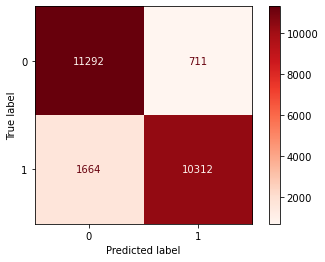

In [12]:
rfc = RandomForestClassifier(n_estimators = 1400, min_samples_split= 2, min_samples_leaf= 2, max_features= 'auto', max_depth= None, 
                             bootstrap= False, n_jobs= -1, random_state=70)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Testing Score: {rfc.score(X_test, y_test)}')
print()
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot(cmap = 'Reds', values_format='');

In [38]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

Accuracy:  0.900162642312023
Misclassification Rate:  0.09983735768797698
Recall:  0.8598029392117569
Specificity:  0.9404315587769724
Precision:  0.9350708318198329


### Pickeling Model

We will pickel this model in order to use for deployment.

In [39]:
pickle.dump(rfc, open('E:/BTECH/cstk/Phishing-URL-Detection-main/code/rfc.pkl','wb'))

# IV. Closer Look

A closer look into the importance of each feature can be analyzed.

In [45]:
# Create feature list
feature_list = list(X.columns)

# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: url_length           Importance: 0.191
Variable: qty_dot_domain       Importance: 0.138
Variable: path_length          Importance: 0.132
Variable: domain_length        Importance: 0.102
Variable: qty_dot_url          Importance: 0.074
Variable: query_length         Importance: 0.049
Variable: qty_dot_path         Importance: 0.042
Variable: qty_slash_url        Importance: 0.04
Variable: qty_equal_url        Importance: 0.036
Variable: qty_slash_path       Importance: 0.033
Variable: qty_hyphen_url       Importance: 0.028
Variable: qty_questionmark_url Importance: 0.025
Variable: qty_and_url          Importance: 0.018
Variable: qty_equal_query      Importance: 0.018
Variable: qty_hyphen_domain    Importance: 0.013
Variable: qty_hyphen_path      Importance: 0.011
Variable: qty_dot_query        Importance: 0.008
Variable: qty_and_query        Importance: 0.008
Variable: qty_tilde_url        Importance: 0.005
Variable: qty_equal_path       Importance: 0.005
Variable: qty_tilde_p